# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.

From the analysis of the mouse drug test, we can see that among all the drugs, capomulin and ramicane are the two most 
tested drugs, and these two drugs appears to show the effetcivness as the final tumor volume decreased compared with 
other drugs. From the line graph we can see that as time pass the tumor size decrease in a single mice test.

Additionally, from the statistics and the box plot, there is only one potential outliers within the infubinol 
test. All other drugs showed non-significant mean / median diviation. 

Also, from the linear regression ploted in the scatter graph, we can conclude there are evident positive co-reltion between
these two factors as the weight increase the average tumor volume inclease.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(study_results, mouse_metadata, how ='left', on = 'Mouse ID')
# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
num_of_mice = len(combined_df['Mouse ID'].unique())
num_of_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
grouped_mouse = combined_df.groupby(['Mouse ID', 'Timepoint']).size()
grouped_mouse_df = grouped_mouse.reset_index(name = 'Counts')
grouped_mouse_df

duplicated = grouped_mouse_df.loc[grouped_mouse_df['Counts']>1, :]
duplicated

,Mouse ID,Timepoint,Counts
586,g989,0,2
587,g989,5,2
588,g989,10,2
589,g989,15,2
590,g989,20,2


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicated_ID = combined_df.loc[combined_df['Mouse ID'] == 'g989', :]
all_duplicated_ID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# select all the mouse ID whom are not in the duplicated table.
cleaned_df = combined_df[~combined_df['Mouse ID'].isin(all_duplicated_ID)]
cleaned_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
count = len(cleaned_df['Mouse ID'].unique())
count

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
# use pandas build in statistics 
mean_val = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_val = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stand_dev = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
stand_err_mean = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# convert to a dataframe
summary_df = pd.DataFrame({'Mean Tumor Volume': mean_val, 'Median Tumor Volume': median_val, \
                          'Tumor Volume Variance': variance, 'Tumor Volume Std. Dev.': stand_dev, \
                          'Tumor Volume Std. Err.': stand_err_mean})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

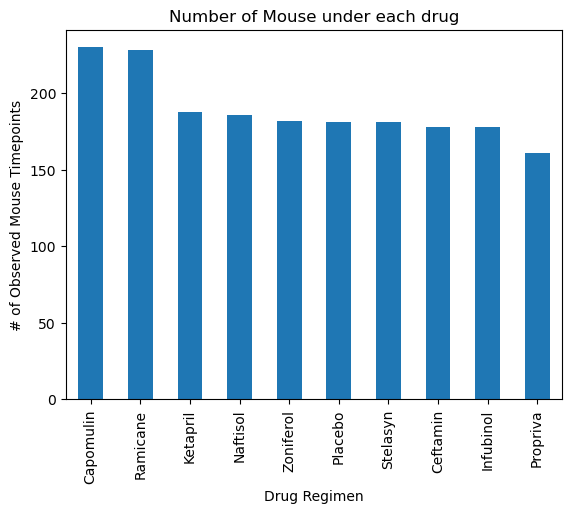

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
g = cleaned_df.groupby('Drug Regimen')['Timepoint'].count()
new_g = g.sort_values(ascending=False)
new_g.plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation = 90)
plt.title('Number of Mouse under each drug')
plt.show()

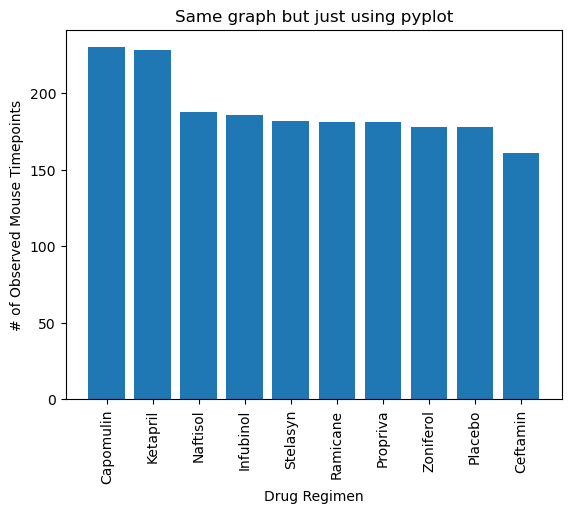

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
count = len(cleaned_df['Drug Regimen'].unique())
x_axis = [n for n in range(1, count+1)] # get the x_axis ticks
x_axis
x_ticks = cleaned_df['Drug Regimen'].unique()
y_axis = cleaned_df['Drug Regimen'].value_counts()
plt.bar(x_axis, y_axis)
plt.xticks(x_axis, x_ticks, rotation='vertical')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Same graph but just using pyplot')
plt.show()

In [10]:
cleaned_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


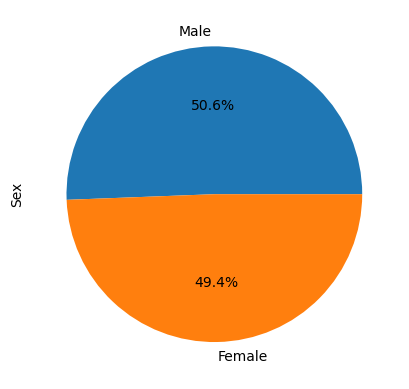

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
to_plot = cleaned_df['Sex'].value_counts()
to_plot.plot(kind = 'pie', autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

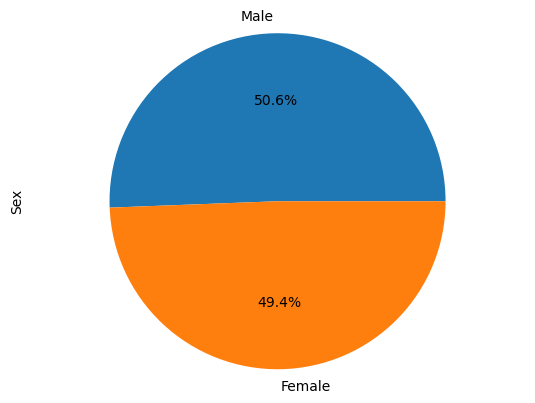

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Calculate the counts of male and female mice
#select sex column from the df and get the number of value for male and female.
male_mice_count = cleaned_df[cleaned_df['Sex'] == 'Male']['Sex'].count()
female_mice_count = cleaned_df[cleaned_df['Sex'] == 'Female']['Sex'].count()

# Prepare data for the pie chart
labels = ['Male', 'Female']
sizes = [male_mice_count, female_mice_count]

# Plot the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
grouped = cleaned_df.groupby('Mouse ID')['Timepoint'].max() # grouping by mouse ID then select the time column and get every mouse ID correspond max value of timepoint
grouped_final = grouped.reset_index() # reset the index to become a dataframe.
grouped_final
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_tumor_df = grouped_final.merge(cleaned_df, how = 'left', on = ['Mouse ID', 'Timepoint'])
merged_tumor_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_lst = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for each in treatments:    
    # Locate the rows which contain mice on each drug and get the tumor volumes using .loc with sepecific boolean mask
    tumor_vol = merged_tumor_df.loc[merged_tumor_df['Drug Regimen'] == each, 'Tumor Volume (mm3)']
    # add subset 
    tumor_vol_lst.append(tumor_vol)
    # calculate the quantiles using pandas .quantile function
    quantiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    lower_q = quantiles[0.25]
    upper_q = quantiles[0.75]
    Iqr = upper_q - lower_q
    # Determine outliers using upper and lower bounds
    lower_bound = lower_q - (1.5*Iqr)
    upper_bound = upper_q + (1.5*Iqr)
    # select the outliers using boolean mask
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"{each} potential outliers: {outliers}.")
    

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64).
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64).
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64.
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64).


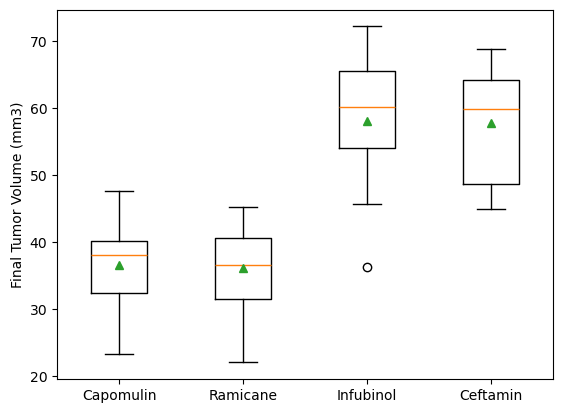

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# plot the box graph with label
plt.boxplot(tumor_vol_lst, labels = treatments, showmeans = True)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

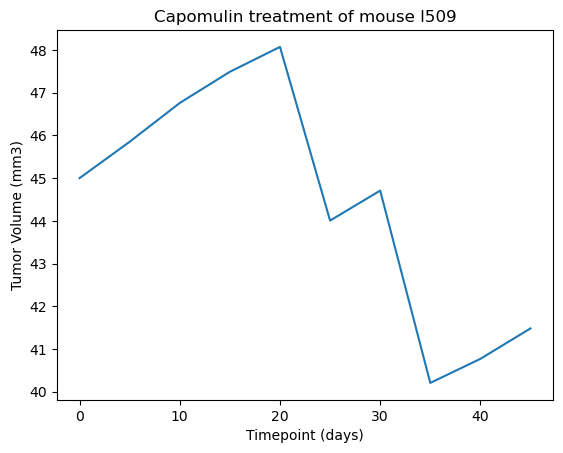

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# select the column with only capomulin and mouse ID is l509, let them be a dataframe.
selected_df = cleaned_df.loc[(cleaned_df['Drug Regimen'] == 'Capomulin') & (cleaned_df['Mouse ID'] == 'l509')]
selected_df
# plot the line graph
plt.plot(selected_df['Timepoint'], selected_df['Tumor Volume (mm3)'])
# apply labels
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

In [17]:
# from the merged df to select only capomulin drug with all rows.
mouse_on_capo = cleaned_df.loc[cleaned_df['Drug Regimen'] == 'Capomulin']
mouse_on_capo

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


In [18]:
# from the grouped df select two needed columns then find their mean for each mouse ID
avg = mouse_on_capo.groupby('Mouse ID')[['Tumor Volume (mm3)', 'Weight (g)']].mean()
avg

,Tumor Volume (mm3),Weight (g)
Mouse ID,,
b128,41.963636,22.0
b742,40.083699,21.0
f966,36.505973,17.0
g288,41.990097,19.0
g316,44.613344,22.0
i557,44.805810,24.0
i738,39.141053,20.0
j119,44.465236,23.0
j246,43.216925,21.0


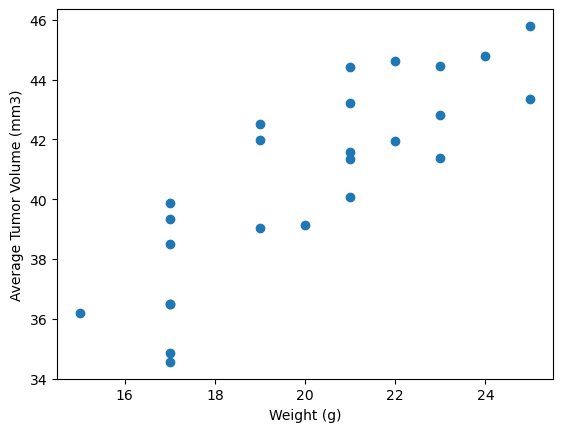

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(avg['Weight (g)'], avg['Tumor Volume (mm3)']) #plot the scatter graph
# apply x and y label
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


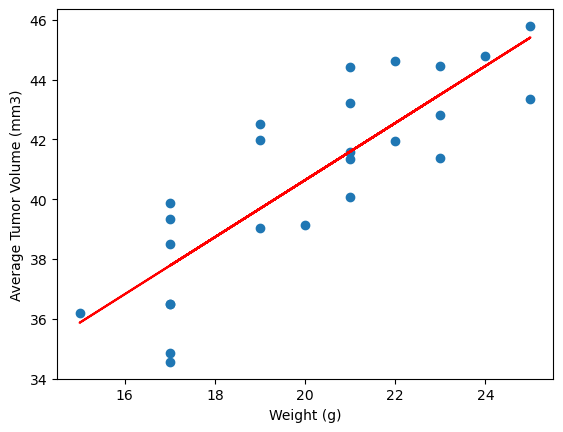

In [20]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

weight = avg.iloc[:, 1] # using iloc select the weight from avg dataframe as the x for corr
avg_tumor_size = avg.iloc[:, 0] # use iolc selct tumor size as y

correlation = st.pearsonr(weight, avg_tumor_size) # use scipy st module to calculate the Pearson R 
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}.")

plt.scatter(avg['Weight (g)'], avg['Tumor Volume (mm3)']) # re-plot the scatter plot.

x = avg['Weight (g)'] # select weight from avg dataframe as x
y = avg['Tumor Volume (mm3)'] # select tumor volume as y

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y) # use scipy stat module for linear regression
regression_value = x*slope + intercept # use y = mx + b to calculate the regression value y
plt.plot(x, regression_value, color = 'r') # plot the regression line

# apply x and y label.
plt.xlabel('Weight (g)') 
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()